In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_column',None)
warnings.filterwarnings('ignore')
import re

In [2]:
data = pd.read_csv("D:\IMARTICUS\MACHINE LEARNING(PROJECTS)\Hotel Reservations.csv")

In [3]:
data.shape

(36275, 19)

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
data.describe().T.style

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.000000,1.844962,0.518715,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.000000,0.105279,0.402648,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,36275.000000,0.810724,0.870644,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,36275.000000,2.204300,1.410905,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,36275.000000,0.030986,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,36275.000000,85.232557,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
arrival_year,36275.000000,2017.820427,0.383836,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,36275.000000,7.423653,3.069894,1.000000,5.000000,8.000000,10.000000,12.000000
arrival_date,36275.000000,15.596995,8.740447,1.000000,8.000000,16.000000,23.000000,31.000000
repeated_guest,36275.000000,0.025637,0.158053,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
data.drop('Booking_ID', axis = 1, inplace = True)

In [8]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### BOOKING_STATUS (target variable)

In [9]:
data.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

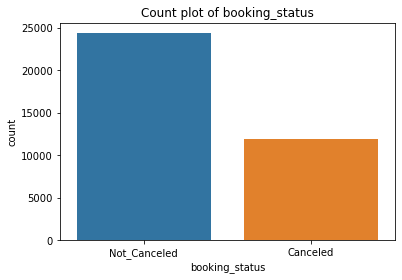

In [10]:
sns.countplot(data.booking_status)
plt.title('Count plot of booking_status')
plt.show()

### 0. No_of_Adults

In [11]:
data.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

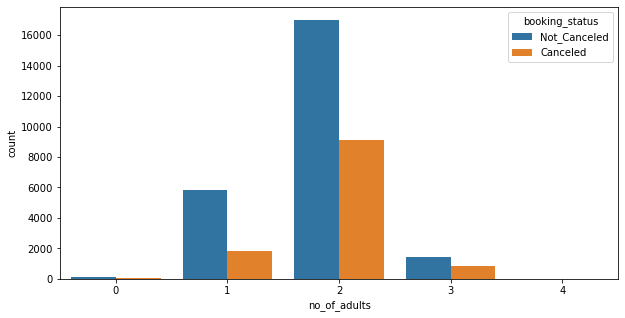

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="no_of_adults", hue="booking_status")
plt.show()

### 1. No_of_Children

In [13]:
data.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

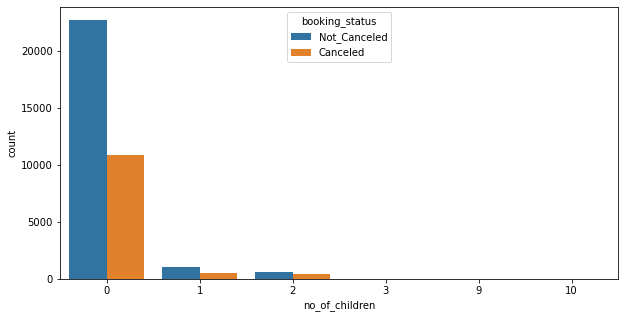

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="no_of_children", hue="booking_status")
plt.show()

### 2. No_Of_Weekend_Nights

In [15]:
data.no_of_weekend_nights.value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

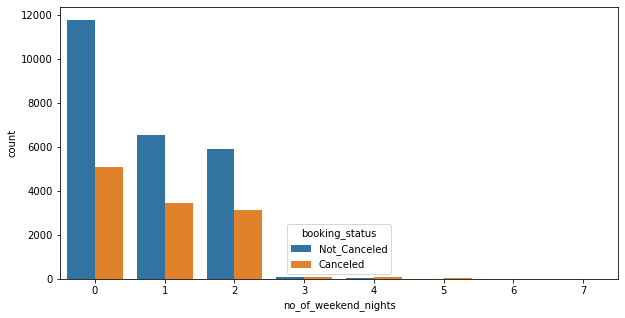

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="no_of_weekend_nights", hue="booking_status")
plt.show()

### 3. No_of_Week_Nights

In [17]:
data.no_of_week_nights.value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

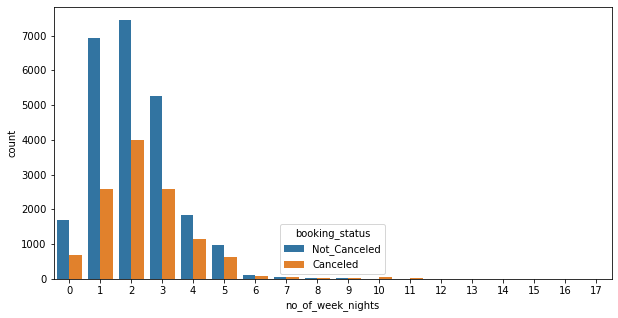

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="no_of_week_nights", hue="booking_status")
plt.show()

### 4. Type_Of_Meal_Plan

In [19]:
data.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

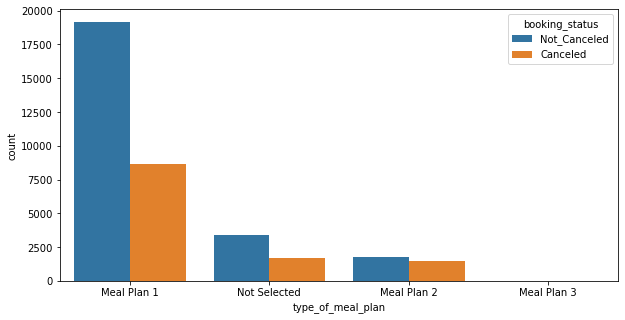

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="type_of_meal_plan", hue="booking_status")
plt.show()

### 5. Required_car_parking_space

In [21]:
data.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

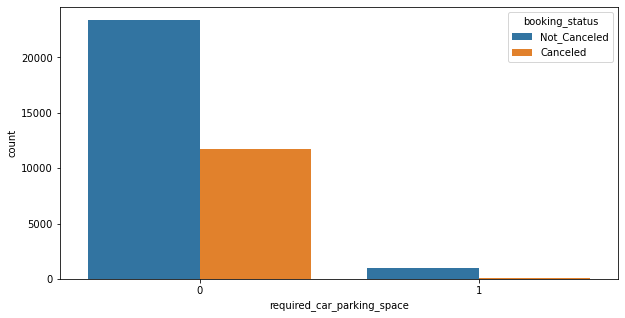

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="required_car_parking_space", hue="booking_status")
plt.show()

### 6. Room_type_reserved

In [23]:
data.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

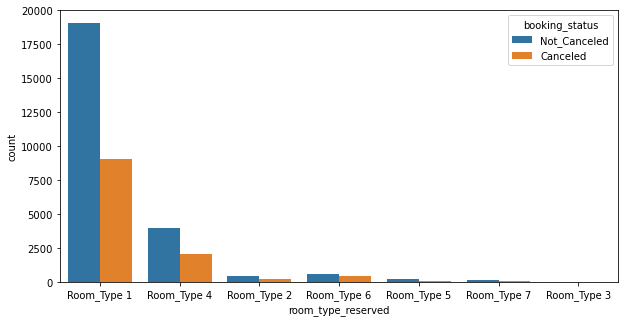

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="room_type_reserved", hue="booking_status")
plt.show()

### 7. Lead_time

In [25]:
data.lead_time.value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

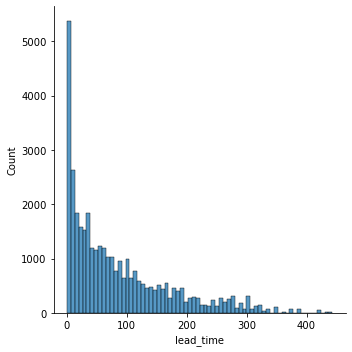

In [26]:
sns.displot(data = data , x = 'lead_time') # positively skewed data

Text(0.5, 1.0, 'Box Plot of lead_time')

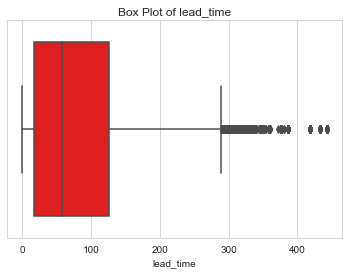

In [27]:
sns.set_style('whitegrid')
sns.boxplot(data.lead_time, color = 'r')
plt.title('Box Plot of lead_time')

In [28]:
IQR = data.lead_time.quantile(.75) - data.lead_time.quantile(.25)
IQR


109.0

In [29]:
UL = data.lead_time.quantile(.75) + (1.5 * IQR)
UL

289.5

In [30]:
LL = data.lead_time.quantile(.25) - (1.5 * IQR)
LL

-146.5

In [31]:
len(data[data.lead_time > UL])

1331

In [32]:
len(data[data.lead_time < LL])


0

In [33]:
data['lead_time'] = np.where(data['lead_time'] > UL, UL, data['lead_time'])


Text(0.5, 1.0, 'Box Plot of lead_time')

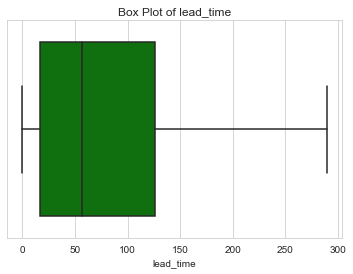

In [34]:
sns.set_style('whitegrid')
sns.boxplot(data.lead_time, color = 'g')
plt.title('Box Plot of lead_time')

### 8.Arrival_year

In [35]:
data.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

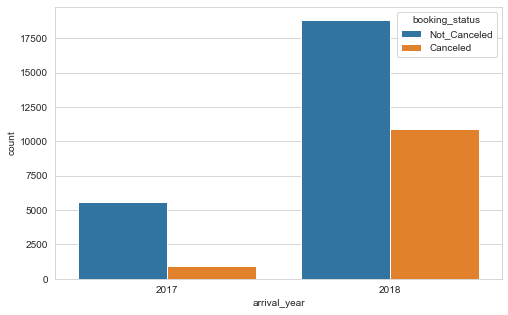

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="arrival_year", hue="booking_status")
plt.show()

### 9. Arrival_month

In [37]:
data.arrival_month.value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

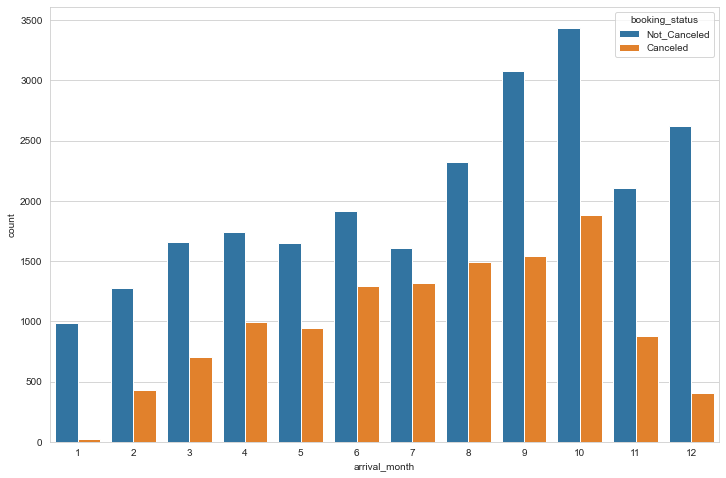

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x="arrival_month", hue="booking_status")
plt.show()

### 10. Arrival_date

In [39]:
data.arrival_date.value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

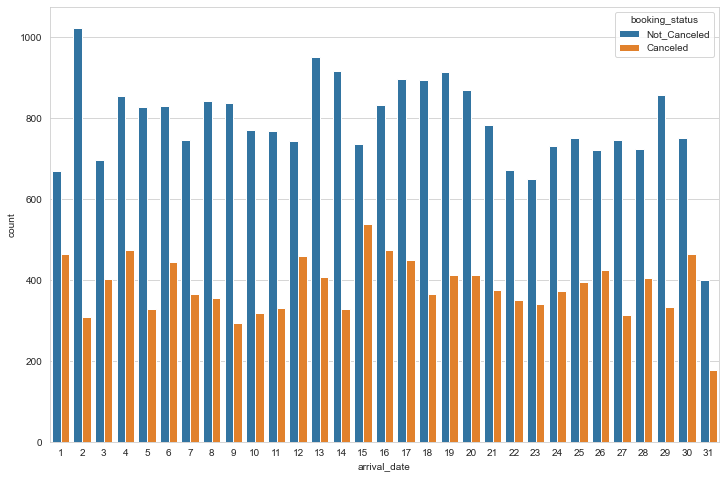

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x="arrival_date", hue="booking_status")
plt.show()

### 11. Market_segment_type

In [41]:
data.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

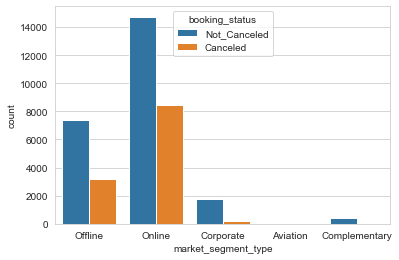

In [42]:
sns.countplot(data=data, x="market_segment_type", hue="booking_status")
plt.show()

### 12. Repeated_guest

In [43]:
data.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

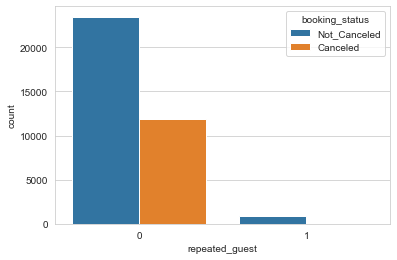

In [44]:
sns.countplot(data=data, x="repeated_guest", hue="booking_status")
plt.show()

### 13. No_of_previous_cancellations

In [45]:
data.no_of_previous_cancellations.value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

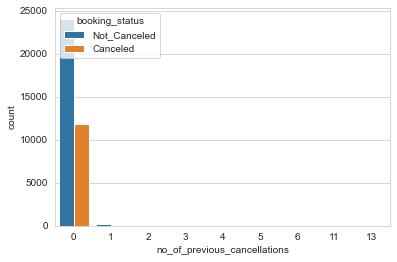

In [46]:
sns.countplot(data=data, x="no_of_previous_cancellations", hue="booking_status")
plt.show()

### 14. No_of_previous_bookings_not_canceled

In [47]:
data.no_of_previous_bookings_not_canceled.value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

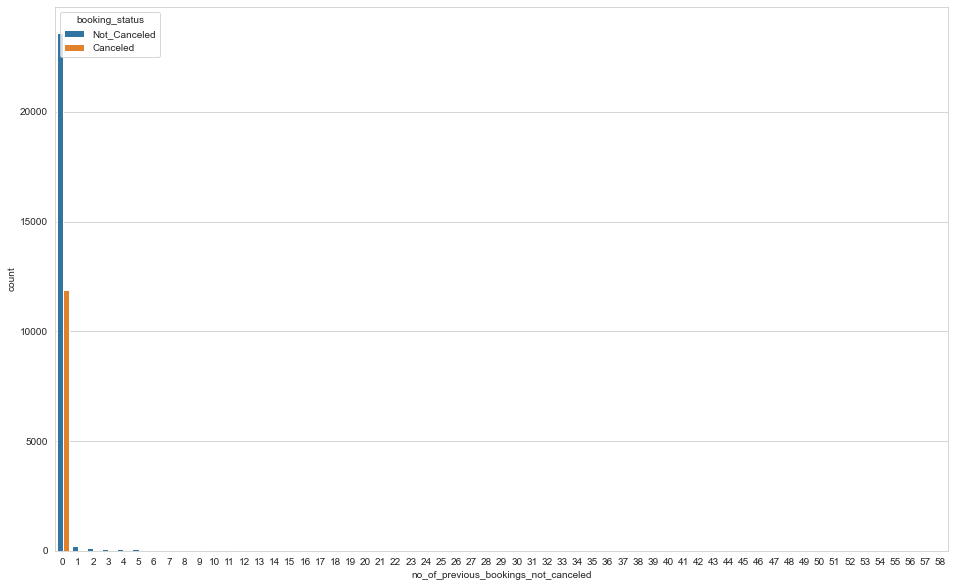

In [48]:
plt.figure(figsize=(16,10))
sns.countplot(data=data, x="no_of_previous_bookings_not_canceled", hue="booking_status")
plt.show()

### 15. Avg_price_per_room

In [49]:
data.avg_price_per_room.value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

In [50]:
# fix the outliers 
iqr_fa = stats.iqr(data['avg_price_per_room'])
iqr_fa

39.7

In [51]:
Q1 = data['avg_price_per_room'].quantile(0.25)

Q3 = data['avg_price_per_room'].quantile(0.75)

upper_bound = Q3 + 1.5*iqr_fa
lower_bound = Q1 - 1.5*iqr_fa

In [52]:
data['avg_price_per_room'] = np.where(data['avg_price_per_room'] > upper_bound , upper_bound , data['avg_price_per_room'])

In [53]:
data['avg_price_per_room'] = np.where(data['avg_price_per_room'] < lower_bound , lower_bound , data['avg_price_per_room'])

<AxesSubplot:xlabel='avg_price_per_room'>

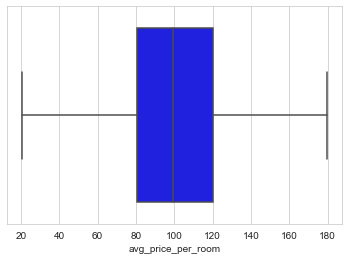

In [54]:
sns.boxplot(data = data , x = 'avg_price_per_room' , color='b') # outlier fixed 

### 16. No_of_special_requests

In [55]:
data.no_of_special_requests.value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

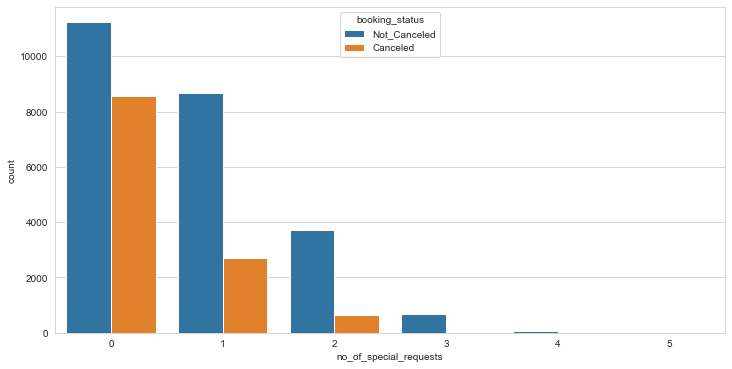

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="no_of_special_requests", hue="booking_status")
plt.show()

In [57]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [58]:
col = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']

### LABEL ENCODING

In [65]:
from sklearn import preprocessing
label_e = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

In [66]:
for col in data.columns:
    # Check if column data type is object (i.e. string)
    if data[col].dtype == 'object':
        # Create a LabelEncoder object and fit it to the column
        le = LabelEncoder()
        le.fit(data[col])
        # Transform the column values with the fitted encoder
        data[col] = le.transform(data[col])

In [68]:
data.tail(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,2,0,1,3,0,0,0,15.0,2018,5,30,4,0,0,0,100.73,0,1
36266,2,0,2,2,0,0,1,8.0,2018,3,4,4,0,0,0,85.96,1,0
36267,2,0,1,0,3,0,0,49.0,2018,7,11,4,0,0,0,93.15,0,0
36268,1,0,0,3,0,0,0,166.0,2018,11,1,3,0,0,0,110.00,0,0
36269,2,2,0,1,0,0,5,0.0,2018,10,6,4,0,0,0,179.55,0,0
36270,3,0,2,6,0,0,3,85.0,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228.0,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148.0,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63.0,2018,4,21,4,0,0,0,94.50,0,0
36274,2,0,1,2,0,0,0,207.0,2018,12,30,3,0,0,0,161.67,0,1


### CORRELATION GRAPH

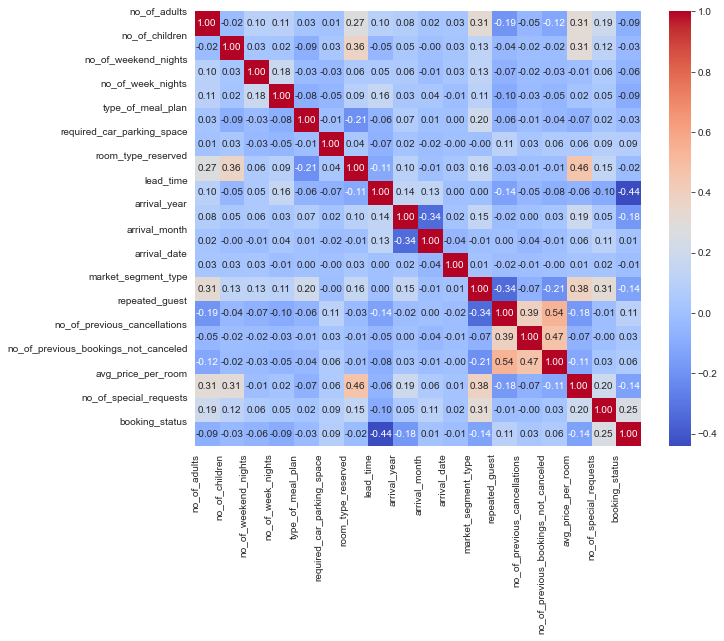

In [69]:
## Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### Selecting important features based on Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [71]:
x = data.drop('booking_status', axis = 1)
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224.0,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5.0,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1.0,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211.0,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48.0,2018,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85.0,2018,8,3,4,0,0,0,167.80,1
36271,2,0,1,3,0,0,0,228.0,2018,10,17,4,0,0,0,90.95,2
36272,2,0,2,6,0,0,0,148.0,2018,7,1,4,0,0,0,98.39,2
36273,2,0,0,3,3,0,0,63.0,2018,4,21,4,0,0,0,94.50,0


In [72]:
y = data['booking_status']
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int32

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 123) 

In [74]:
x_train.shape

(27206, 17)

In [75]:

y_train.shape

(27206,)

In [76]:
x_test.shape

(9069, 17)

In [77]:
y_test.shape

(9069,)

In [78]:
S_Model = SelectFromModel(RandomForestClassifier(n_estimators = 100))
S_Model.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [79]:
S_Model.get_support()

array([False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False,  True,  True])

In [80]:
S_Feat = x_train.columns[(S_Model.get_support())]
len(S_Feat)

5

In [81]:
print(S_Feat)

Index(['lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


In [82]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [83]:
RFC = RandomForestClassifier(n_estimators = 150)
random_forest = RFC.fit(x_train, y_train)

In [84]:
IMP_FEATURE = pd.DataFrame({'Feature' : list(x_train.columns), 'Importance' :  random_forest.feature_importances_})

In [85]:
IMP_FEATURE

,Feature,Importance
0,no_of_adults,0.024348
1,no_of_children,0.007840
2,no_of_weekend_nights,0.037246
3,no_of_week_nights,0.050986
4,type_of_meal_plan,0.017574
5,required_car_parking_space,0.006296
6,room_type_reserved,0.015427
7,lead_time,0.323936
8,arrival_year,0.025338
9,arrival_month,0.079700


## The important features from the RandomForest are

### 'lead_time'

### 'arrival_month'

### 'arrival_date'

### 'avg_price_per_room'

### 'no_of_special_requests'

### Handling unbalanced data usinf SMOTE

In [86]:
from sklearn.utils import resample

In [88]:
data.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [91]:
not_y = data[data.booking_status == 0]
len(not_y)


11885

In [93]:
yes_y = data[data.booking_status == 1]
len(yes_y)

24390

In [94]:
y_df = resample(yes_y, replace = True, n_samples = len(not_y), random_state = 6)

In [95]:
y_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
28444,2,0,0,1,0,0,0,16.0,2018,3,11,2,0,0,0,75.00,0,1
12455,2,0,1,2,1,0,0,31.0,2018,8,22,3,0,0,0,147.72,0,1
15097,2,0,2,3,0,0,3,68.0,2018,3,20,4,0,0,0,99.45,1,1
6982,3,0,0,2,0,0,3,141.0,2018,9,23,4,0,0,0,163.80,1,1
12619,2,0,2,3,0,0,3,16.0,2018,8,28,3,0,0,0,107.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28752,2,0,0,2,0,0,3,11.0,2018,11,17,4,0,0,0,121.00,1,1
20187,2,0,0,1,3,0,0,1.0,2018,9,14,4,0,0,0,149.00,0,1
27337,2,0,0,4,0,0,0,3.0,2017,9,8,4,0,0,0,124.00,0,1
439,2,0,2,1,3,0,0,166.0,2018,8,6,4,0,0,0,94.50,1,1


In [97]:
balanced_df = pd.concat([not_y, y_df])

In [98]:
balanced_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,1,0,2,1,0,0,0,1.0,2018,2,28,4,0,0,0,60.0,0,0
3,2,0,0,2,0,0,0,211.0,2018,5,20,4,0,0,0,100.0,0,0
4,2,0,1,1,3,0,0,48.0,2018,4,11,4,0,0,0,94.5,0,0
5,2,0,0,2,1,0,0,289.5,2018,9,13,4,0,0,0,115.0,1,0
12,2,0,2,1,3,0,0,30.0,2018,11,26,4,0,0,0,88.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28752,2,0,0,2,0,0,3,11.0,2018,11,17,4,0,0,0,121.0,1,1
20187,2,0,0,1,3,0,0,1.0,2018,9,14,4,0,0,0,149.0,0,1
27337,2,0,0,4,0,0,0,3.0,2017,9,8,4,0,0,0,124.0,0,1
439,2,0,2,1,3,0,0,166.0,2018,8,6,4,0,0,0,94.5,1,1


In [100]:
y_train.value_counts()

1    18219
0     8987
Name: booking_status, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
SM = SMOTE(random_state = 6)

In [103]:
SM_x, SM_y = SM.fit_resample(x_train, y_train)

In [104]:
SM_y.value_counts()

1    18219
0    18219
Name: booking_status, dtype: int64

### Standardizing the data using the Scalers provided by sklearn

In [105]:
from sklearn.preprocessing import StandardScaler

In [126]:
Num_features = balanced_df[['lead_time','avg_price_per_room' ]]

In [127]:
Num_features

,lead_time,avg_price_per_room
2,1.0,60.0
3,211.0,100.0
4,48.0,94.5
5,289.5,115.0
12,30.0,88.0
...,...,...
28752,11.0,121.0
20187,1.0,149.0
27337,3.0,124.0
439,166.0,94.5


In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
MM_Scaler = MinMaxScaler()

In [113]:
Columns = Num_features.columns

In [115]:
Num_features = MM_Scaler.fit_transform(Num_features)

In [116]:
Num_features

array([[0.00345423, 0.24716625],
       [0.72884283, 0.49905542],
       [0.16580311, 0.46442065],
       ...,
       [0.01036269, 0.65018892],
       [0.57340242, 0.46442065],
       [0.01727116, 0.49905542]])

In [117]:
df_Num_features = pd.DataFrame(Num_features, columns = Columns)

In [118]:
df_Num_features.sample(10)

,lead_time,avg_price_per_room
17122,0.715026,0.351071
6673,0.411054,0.441751
2182,0.708117,0.668451
10162,1.000000,0.429786
877,0.221071,0.313035
3238,0.169257,0.455919
8455,1.000000,0.606108
19150,0.000000,0.423489
14388,0.245250,0.625000
1793,1.000000,0.625000


In [129]:
Sc_df = balanced_df.copy()

In [136]:
Sc_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,1,0,2,1,0,0,0,1.0,2018,2,28,4,0,0,0,60.0,0,0
3,2,0,0,2,0,0,0,211.0,2018,5,20,4,0,0,0,100.0,0,0
4,2,0,1,1,3,0,0,48.0,2018,4,11,4,0,0,0,94.5,0,0
5,2,0,0,2,1,0,0,289.5,2018,9,13,4,0,0,0,115.0,1,0
12,2,0,2,1,3,0,0,30.0,2018,11,26,4,0,0,0,88.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28752,2,0,0,2,0,0,3,11.0,2018,11,17,4,0,0,0,121.0,1,1
20187,2,0,0,1,3,0,0,1.0,2018,9,14,4,0,0,0,149.0,0,1
27337,2,0,0,4,0,0,0,3.0,2017,9,8,4,0,0,0,124.0,0,1
439,2,0,2,1,3,0,0,166.0,2018,8,6,4,0,0,0,94.5,1,1


In [139]:
Sc_df = balanced_df.drop(['lead_time','avg_price_per_room'])

KeyError: "['lead_time' 'avg_price_per_room'] not found in axis"

### BUILDING LOGISTIC REGRESSION

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int32  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int32  
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [142]:
x = data.drop(['booking_status'], axis = 1)

In [143]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224.0,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5.0,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1.0,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211.0,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48.0,2018,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85.0,2018,8,3,4,0,0,0,167.80,1
36271,2,0,1,3,0,0,0,228.0,2018,10,17,4,0,0,0,90.95,2
36272,2,0,2,6,0,0,0,148.0,2018,7,1,4,0,0,0,98.39,2
36273,2,0,0,3,3,0,0,63.0,2018,4,21,4,0,0,0,94.50,0


In [144]:
y = data['booking_status']

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 123)

In [146]:
x_train.shape

(29020, 17)

In [147]:
x_test.shape

(7255, 17)

In [148]:
y_train.shape

(29020,)

In [149]:
y_test.shape

(7255,)

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
Logi_Reg = LogisticRegression()

In [152]:
LR_Model = Logi_Reg.fit(x_train, y_train)

In [153]:
Logi_Pred = LR_Model.predict(x_test)

In [154]:
Logi_Pred

array([1, 1, 0, ..., 0, 0, 1])

In [155]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [156]:
# confusion_matrix

pd.crosstab(y_test, Logi_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1377,923,2300
1,586,4369,4955
All,1963,5292,7255


In [157]:
confusion_matrix(y_test, Logi_Pred)

array([[1377,  923],
       [ 586, 4369]], dtype=int64)

In [158]:
# classification_report

print(classification_report(y_test, Logi_Pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65      2300
           1       0.83      0.88      0.85      4955

    accuracy                           0.79      7255
   macro avg       0.76      0.74      0.75      7255
weighted avg       0.79      0.79      0.79      7255



In [159]:
# accuracy_score

Logi_accuracy = accuracy_score(y_test, Logi_Pred)
Logi_accuracy

0.7920055134390076

In [ ]:
# f1_score

from sklearn.metrics import f1_score

In [160]:
# define array of actual classes

actual = np.repeat([1, 0], repeats = [2300, 4955])

In [161]:
# define array of predicted classes

pred = np.repeat([1, 0, 1, 0], repeats = [1377, 923, 586, 4369])

In [163]:
from sklearn.metrics import f1_score

In [164]:
# claculate F1 score

f1_score(actual, pred)

0.6460239268121042

In [165]:
# AUC

y_predict = LR_Model.predict_proba(x)
y_predict[:, 1]
plt.show()

In [166]:
# ROC Curve - REceiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate
# fpr = False Positive Rate

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [167]:
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.839


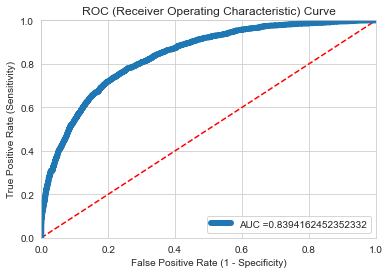

In [168]:
# ROC Curve

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()


### IMPORTANT FEATURES

In [170]:
# With important features

x1 = data[['lead_time','arrival_month','arrival_date','avg_price_per_room','no_of_special_requests']]
x1

,lead_time,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests
0,224.0,10,2,65.00,0
1,5.0,11,6,106.68,1
2,1.0,2,28,60.00,0
3,211.0,5,20,100.00,0
4,48.0,4,11,94.50,0
...,...,...,...,...,...
36270,85.0,8,3,167.80,1
36271,228.0,10,17,90.95,2
36272,148.0,7,1,98.39,2
36273,63.0,4,21,94.50,0


In [172]:
y1 = data['booking_status']
y1

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int32

In [173]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = .2, random_state = 6)

In [174]:
x_train1.shape

(29020, 5)

In [175]:
x_test1.shape

(7255, 5)

In [176]:
y_train1.shape

(29020,)

In [177]:
y_test1.shape

(7255,)

In [178]:
LR_Model_imp = Logi_Reg.fit(x_train1, y_train1)

In [179]:
Logi_Pred_imp = LR_Model_imp.predict(x_test1)
Logi_Pred_imp

array([0, 0, 1, ..., 1, 1, 0])

In [180]:
# confusion_matrix

pd.crosstab(y_test1, Logi_Pred_imp, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1269,1124,2393
1,509,4353,4862
All,1778,5477,7255


In [181]:
confusion_matrix(y_test1, Logi_Pred_imp)

array([[1269, 1124],
       [ 509, 4353]], dtype=int64)

In [182]:
# classification_report

print(classification_report(y_test1, Logi_Pred_imp))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      2393
           1       0.79      0.90      0.84      4862

    accuracy                           0.77      7255
   macro avg       0.75      0.71      0.73      7255
weighted avg       0.77      0.77      0.77      7255



In [183]:
# accuracy_score

Logi_accuracy_imp = accuracy_score(y_test1, Logi_Pred_imp)
Logi_accuracy_imp

0.7749138525155066

In [191]:
# f1_score

from sklearn.metrics import f1_score

In [192]:
# define array of actual classes

actual1 = np.repeat([1, 0], repeats = [7313, 7302])

In [193]:
# define array of predicted classes

pred1 = np.repeat([1, 0, 1, 0], repeats = [6105, 1208, 1152, 6150])

In [194]:
# calculate F1 score

f1_score(actual1, pred1)

0.8380233356211394

In [195]:
# AUC

y_predict1 = LR_Model_imp.predict_proba(x1)
y_predict1[:, 1]
plt.show()

In [189]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate
# fpr = False Positive Rate

fpr, tpr, thresholds = roc_curve(y1, y_predict1[:, 1])
roc_auc = auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.826


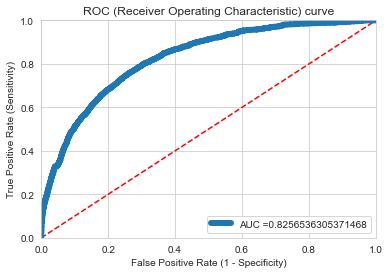

In [190]:
# ROC Curve

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()